In [1]:
%matplotlib inline


# Scientific Computation Lab 8 solution







In lecture, we saw that FFTs could be used to analyze the frequency content of time series. In this lab, you will learn how to use them to differentiate periodic functions.

We will work with a Gaussian function, $f(x) = exp(-\alpha x^2)$
with $-5 \le x \le 5$. We will choose $\alpha$ so that the Gaussian is sufficiently narrow for f and several of its derivatives to be near zero at the boundaries (why?). The function below will generate this Gaussian with $x$ and $\alpha$ provided as input.

In [2]:
import numpy as np
def gauss(x,alpha):
    return np.exp(-alpha*x**2)

### Part 1: Fourier coefficients

1) Complete the cell below so that it generates a grid, $x$, with $N=100$ points in the interval [-5, 5).
One approach is to first generate $N+1$ points from -5 to 5, and then remove the $N+1$th point.

In [3]:
import numpy as np
N=100
alpha = 4
#Add code here
x = np.linspace(-5,5,N+1)
x=x[:-1]

2) Now generate the Guassian and plot $f(x)$. Is $\alpha$ sufficiently large?

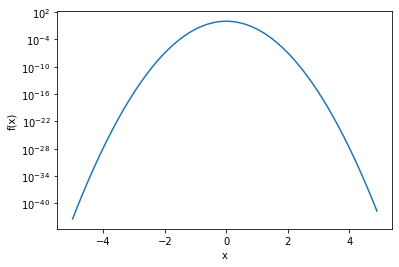

In [4]:
import matplotlib.pyplot as plt
#add code here
plt.figure()
f = gauss(x,alpha)
plt.semilogy(x,np.abs(f))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

We require the function and its derivatives to be near machine zero (1e-16) at the boundaries of the domain. It is difficult to assess the derivatives from a figure, but the function itself is small enough for us to "guess" that a Fourier series representation will be reasonable.

2) Now, compute the Gaussian's Fourier coefficients ($c_n$) and plot $|c_n|$ on a semilog plot. Compute a new Gaussian, $g$  with $\alpha=1$. 
Compute its Fourier coefficients and add them to your plot. Why are the two curves different?

Text(0, 0.5, 'Amplitude of Fourier coefficients')

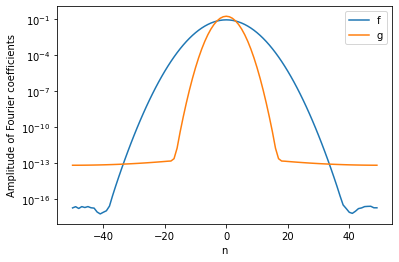

In [5]:
#add code here
#first function, f(x)
c = np.fft.fft(f)/N
n = np.arange(-N/2,N/2)
plt.figure()
plt.semilogy(n,np.fft.fftshift(np.abs(c)))

#second function, g(x)
g = gauss(x,1)
d = np.fft.fft(g)/N
plt.semilogy(n,np.fft.fftshift(np.abs(d)))

plt.legend(('f','g'))
plt.xlabel('n')
plt.ylabel('Amplitude of Fourier coefficients')


With a smaller $\alpha$, the Gaussian is broader and the function's derivatives are larger at the boundary (and opposite signs at each end). We know that "discontinuities" at the boundary adversely affect the convergence of Fourier series and this is reflected in the relatively slow decay of coefficients for $n \gtrsim 16$

### Part 2: Differentiation

For time series, the *kth* Fourier coefficient corresponds to a frequency, $\phi_k= k/\tau$ where $\tau$ is related to the timespan of the signal. For a spatially varying function, the *kth* coefficient corresponds to a wavenumber, $\alpha_k=2 \pi k/l$ where for our example above, $l=10$. The wavenumber plays a key role in Fourier differentiation. If the Fourier coefficients of $f(x)$ are $c_k$, then the Fourier coefficients of $df/dx$ are $i \alpha_k c_k$.

The basic steps then are, i) construct $\alpha_k$, ii) compute $c_k$, iii) compute the inverse Fourier transform of $i \alpha_k c_k$. 

1) Construct $\alpha_k$ for $f(x)$ from our example above. Now, $k$ and $\alpha$ will have to be in "fft order", $k=0,1,...,N/2-1,-N/2,-N/2+1,...,-1$

In [6]:
n = np.fft.fftshift(n)
#add code here
k = 2*np.pi*n/10
print(n[:5],n[-1])

[0. 1. 2. 3. 4.] -1.0


2) Now, compute $df$, an arrray which is $N$ times the inverse FFT of $i\alpha c$. Here $\alpha$ is an array of wavenumbers, and $c$ is an array of Fourier coefficients.

In [7]:
#add code here
df = N*np.fft.ifft(1j*k*c)

Note that we have divided by N to get c, and then re-multiplied by N before taking the ifft. If we were only interested in df/dx, we could have left out these steps.

The code below will plot $df$ and the exact derivative of the Gaussian. If $df$ has been constructed correctly, the two should be extremely close.

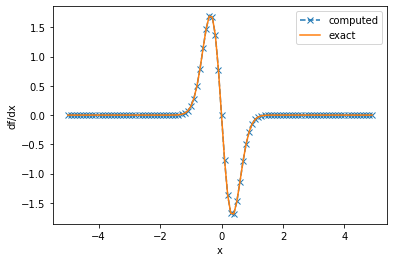

In [11]:
plt.figure()
plt.plot(x,df.real,'x--')
plt.plot(x,-2*alpha*x*f)
plt.xlabel('x')
plt.ylabel('df/dx')
plt.legend(('computed','exact'))

3) Repeat the steps above with *N=25* and *N=50*. Compute the error, $\epsilon(x) = |df_{computed}-df_{exact}|$ for all three values of *N* and plot them on a figure.

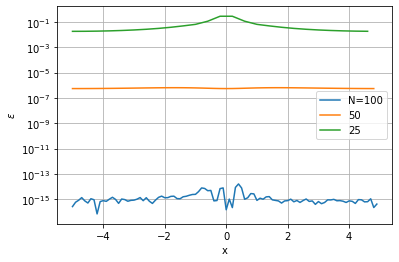

In [14]:
#add code here
N2=25
x2 = np.linspace(-5,5,N2+1)
x2=x2[:-1]
n2 = np.fft.fftshift(np.arange(-N2/2,N2/2))
k2 = 2*np.pi*n2/10
g = gauss(x2,alpha)
d = np.fft.fft(g)
dg = np.fft.ifft(1j*k2*d)

N3=50
x3 = np.linspace(-5,5,N3+1)
x3=x3[:-1]
n3 = np.fft.fftshift(np.arange(-N3/2,N3/2))
k3 = 2*np.pi*n3/10
h = gauss(x3,alpha)
e = np.fft.fft(h)
dh = np.fft.ifft(1j*k3*e)


dfexact=-2*alpha*x*f
dgexact=-2*alpha*x2*g
dhexact=-2*alpha*x3*h
e1 = np.abs(df-dfexact)
e2 = np.abs(dg-dgexact)
e3 = np.abs(dh-dhexact)

plt.figure()
plt.semilogy(x,e1,x3,e3,x2,e2)

plt.grid()
plt.xlabel('x')
plt.ylabel(r'$\epsilon$')
plt.legend(('N=100','50','25'))




4) A critically important idea is "grid convergence" which is connected to the rate at which the error decreases as $\Delta x$ decreases (or as $N$ increases). For a well-posed method, for sufficiently small $\Delta x$, the solution should be *grid independent* -- further reductions in the grid spacing will not meaningfully reduce the error any further. This typically occurs when the error is close to ~$1e-15$. At (approximately) what value of $N$ does the differentiation of the Gaussian (with $\alpha=4$) become grid independent?

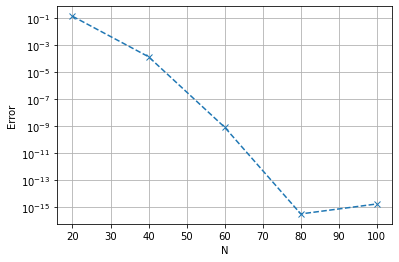

In [10]:
#Compute error for a few values of N and display results
Nlist = [20,40,60,80,100]
elist = []
alpha=4
L=10
for N in Nlist:
    x = np.linspace(-L/2,L/2,N+1)
    x=x[:-1]
    f = gauss(x,alpha)
    n = np.arange(-N/2,N/2)
    ik = 1j*np.fft.fftshift(n)*2*np.pi/L
    df = np.fft.ifft(ik*np.fft.fft(f))
    dfexact=-2*alpha*x*f
    elist.append(np.mean(np.abs(df-dfexact)))

plt.figure()
plt.semilogy(Nlist,elist,'x--')
plt.xlabel('N')
plt.ylabel('Error')
plt.grid()    

The figure above shows the error decreasing (near) exponentially and the computed derivative is grid independent for $N \gtrsim 80$